**Note:** In this PartB of the assignment, certain sections such as data loading and data exploration are identical to those in PartA. As this assignment requires multiple features utilisation for multivariate linear regression, these steps are essential.

### • Business Understanding

•	**Introduction:** This project involves working with a consolidated dataset compiled from census data in the USA to build a regression model. Through data exploration, cleaning, and appropriate multiple features selection, the objective is to create a model that accurately predicts the mortality rate on unseen data. The resulting model can be used to gain insights into the relationships between different variables and inform decision-making processes.

•	**Dataset:** Regression analysis on US census data (comparising various 33 freatures informaiton about US counties), following are the datasets.

        Training set: cancer_us_county-training.csv
        Testing set: cancer_us_county-testing

•	**Business Problem:** Develop a model for Multivariate Linear Regression, which can accurately predict cancer mortality rates. The model should use all or multiple data characteristics associated with U.S. counties. Emphasis should be placed on the effectiveness of using multiple features to achieve this goal.

The following tasks are carried out to perform this Multiple Linear Regression.

• Business Understanding

• Data Understanding

        1] Loading  Data
        2] Exploring Data
        3] Analysing Relationship between Target and Independent Feature

• Data Preparation

        4] Selecting Target and Independent Feature
        5] Splitting Data into Training, Validation and Testing Sets

• Modeling

        6] Assessing Baseline Performance
        7] Training Univariate Linear Regression Model

• Model Evaluation

        8] Analysing Model Performance
    
• Summary and Deployment Suggestion

In [1]:
# Importing required Python libraries
import numpy as np
import pandas as pd

# Importing SKLearn libaries and Linear Regression ML Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

# Importing required Data Visualization libraries
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Importing other formatting libraries
from quo import echo
import warnings

In [2]:
#Ignoring warnings to maintain a clean coding.
warnings.filterwarnings("ignore")

### • Data Understanding

#### 1] Loading  Data

In [3]:
# Creating variable named file_url to hold the path for csv data files. Note: Change this path to the appropriate path of file location for successful loading of data.
file_url = '/Users/monalipatil/Monali/MDSI-Semester1/Machine Learning Algorithms and Applications/Assignment1/'

# Loading training and testing data into pandas separate dataframes namely 'df_train' and 'df_test'. 
df_train = pd.read_csv(file_url + 'cancer_us_county-training.csv')
df_test = pd.read_csv( file_url + 'cancer_us_county-testing.csv')

#### 2] Exploring Data

• Checking some datapoints of the datasets. 

In [4]:
# Displaying first 5 rows of the training dataset. 
df_train.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4


In [5]:
# Displaying first 5 rows of the testing dataset. 
df_test.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,449.0,154,159.5,479.8,51880,104926,18.7,57.183158,"(51046.4, 54545.6]",30.2,...,51.0,24.9,13.1,81.260411,4.154831,10.045737,0.876222,41.071243,4.367123,2553
1,340.0,140,167.2,438.5,55472,55423,12.4,0.000000,"(54545.6, 61494.5]",46.9,...,37.6,36.3,16.0,93.660078,0.818115,0.626281,3.116360,57.529142,6.844366,904
2,54.0,18,131.6,410.8,49380,10103,11.7,0.000000,"(48021.6, 51046.4]",49.4,...,32.6,40.3,19.4,98.292181,0.041152,0.164609,0.051440,55.928482,1.604585,2192
3,94.0,46,189.4,403.8,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,...,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
4,2718.0,1065,168.9,432.1,51527,726106,20.7,60.597213,"(51046.4, 54545.6]",33.5,...,41.7,37.7,25.8,57.002148,7.093743,14.785464,11.692122,51.852122,6.148433,2394


•	Checking dimension of the datasets.

In [6]:
# Describing the number of rows and columns/shape from both datasets.
print(df_train.shape)
print("\nThus, the training dataset consist of:")
print("Rows: {}".format(df_train.shape[0]))
print("Columns: {}".format(df_train.shape[1]))

print("\n\n", df_test.shape)
print("\nThus, the testing dataset consist of:")
print("Rows: {}".format(df_test.shape[0]))
print("Columns: {}".format(df_test.shape[1]))

(2438, 35)

Thus, the training dataset consist of:
Rows: 2438
Columns: 35


 (609, 35)

Thus, the testing dataset consist of:
Rows: 609
Columns: 35


•	Identifying attributes names. 

In [7]:
# Checking attributes of the dataset.
df_train.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'Id'],
      dtype='object')

•	Describing summary information of the dataset.

In [8]:
# Checking attributes summary information(features datatypes) of the dataset.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   TARGET_deathRate         2438 non-null   float64
 3   incidenceRate            2438 non-null   float64
 4   medIncome                2438 non-null   int64  
 5   popEst2015               2438 non-null   int64  
 6   povertyPercent           2438 non-null   float64
 7   studyPerCap              2438 non-null   float64
 8   binnedInc                2438 non-null   object 
 9   MedianAge                2438 non-null   float64
 10  MedianAgeMale            2438 non-null   float64
 11  MedianAgeFemale          2438 non-null   float64
 12  Geography                2438 non-null   object 
 13  AvgHouseholdSize         2438 non-null   float64
 14  PercentMarried          

#### Observation: 
* In the dataset, most attributes are of an integer(int64), decimal(float) data type and two are of string/character(object) data type.

•	Checking summary statistics of the dataset.

In [9]:
# Describing the summary statistics the dataset Note: Only integer datatype's variables summary is described by default.
df_train.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438.000000,2438.000000,...,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,45.313782,39.640853,...,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,45.053173,5.217646,...,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,37.800000,36.400000,...,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,41.000000,39.600000,...,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,44.075000,42.500000,...,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000
max,24965.000000,9445.000000,293.900000,1014.200000,125635.000000,5.238216e+06,47.400000,9762.308998,624.000000,64.700000,...,70.700000,65.100000,46.600000,100.000000,84.866024,42.619425,41.930251,78.075397,18.556701,3046.000000


In [10]:
# Describing summary statistics for all datatype variables of the dataset.
df_train.describe(include='all')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438,2438.000000,...,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(40362.7, 42724.4]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,NaN,45.313782,...,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,NaN,45.053173,...,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,...,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,NaN,37.800000,...,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,NaN,41.000000,...,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,NaN,44.075000,...,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000


• Inspecting if any null values in the datasets.

In [11]:
# Checking if any null values in the training datasets.
df_train.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1826
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          122
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     500
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

#### Observation: 

* There are three numerical features in the training dataset with significant amount of missing values comprising 'PctSomeCol18_24', 'PctEmployed16_Over' and 'PctPrivateCoverageAlone'. Since machine learning linear algorithms cannot handle missing value in continuous/any attributes, we must either handle these missing values or remove the columns altogether.

* The 'PctSomeCol18_24' feature denotes the percentage of individuals aged between 18 and 24 years who have attained some college education. However, since more than 70% of the records have missing values in this column (only 612 recorded out of 2438), it is impractical to fill them with mean values. Therefore, removing this feature from both the dataset.

* For the rest two columns 'PctEmployed16_Over' and 'PctPrivateCoverageAlone', substituting null values with its mean value. 

In [12]:
# Dropping 'PctSomeCol18_24' column from both datasets as it has higher number of nulls values. 
df_train.drop(['PctSomeCol18_24'], axis=1, inplace=True) 
df_test.drop(['PctSomeCol18_24'], axis=1, inplace=True)

# Filling null values from 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' columns with its mean value of the training dataset.
df_train['PctEmployed16_Over'].fillna(df_train['PctEmployed16_Over'].mean(), inplace=True)
df_train['PctPrivateCoverageAlone'].fillna(df_train['PctPrivateCoverageAlone'].mean(), inplace=True)

In [13]:
# Checking if any null values in the testing datasets.
df_test.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          30
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    109
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRat

#### Observation: 

* Similarly, the testing dataset has two attributes namely 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' with notable amounts of missing values, and they must be treated appropriately as will be tesitng model with all features. 

* Therefore, altering these columns' null values with their mean.

In [14]:
# Replacing null values from 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' columns of the testing dataset with its mean value.
df_test['PctEmployed16_Over'].fillna(df_test['PctEmployed16_Over'].mean(),inplace=True)
df_test['PctPrivateCoverageAlone'].fillna(df_test['PctPrivateCoverageAlone'].mean(),inplace=True)

• Checking if any missing values in the datasets.

In [15]:
# Checking if any missing values in the trainng dataset.
df_train.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

<Axes: >

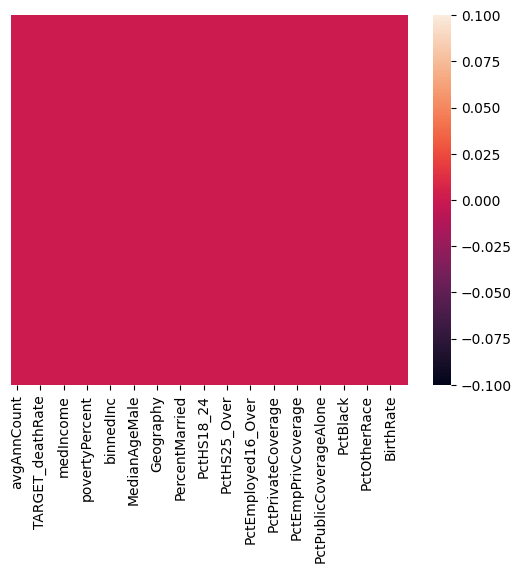

In [16]:
# Generating heatmap is another method to check missing values in the dataset. 
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=True)

In [17]:
# Checking if any missing values in the testing dataset.
df_test.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

<Axes: >

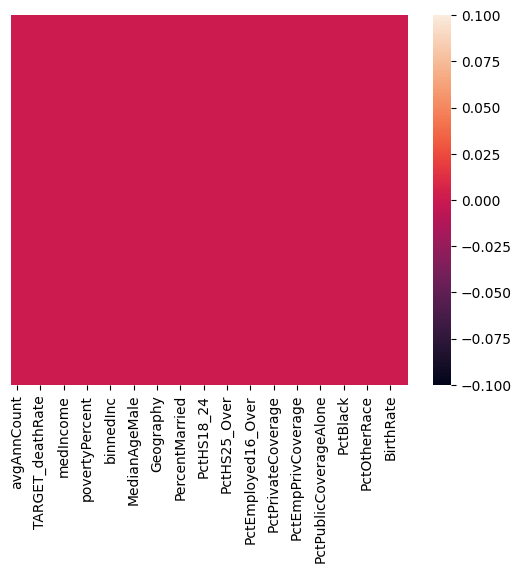

In [18]:
# Generating heatmap to check missing values in the testing dataset. 
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=True)

• Examining if any duplicate values in the datasets.

In [19]:
# Examining if any duplicate values in the training dataset.
df_duplicate_rows = df_train[df_train.duplicated()]
print("The number of duplicate rows in the training dataset:", df_duplicate_rows.shape)

The number of duplicate rows in the training dataset: (0, 34)


In [20]:
# Examining if any duplicate values in the testing dataset.
df_duplicate_rows = df_test[df_test.duplicated()]
print("The number of duplicate rows in the training dataset:", df_duplicate_rows.shape)

The number of duplicate rows in the training dataset: (0, 34)


#### Observation: 

* The heatmap indicates that both the datasets has no missing values once the null values have been replaced with the mean.

#### 3] Analysing Relationship between Target and Independent Feature

<Axes: >

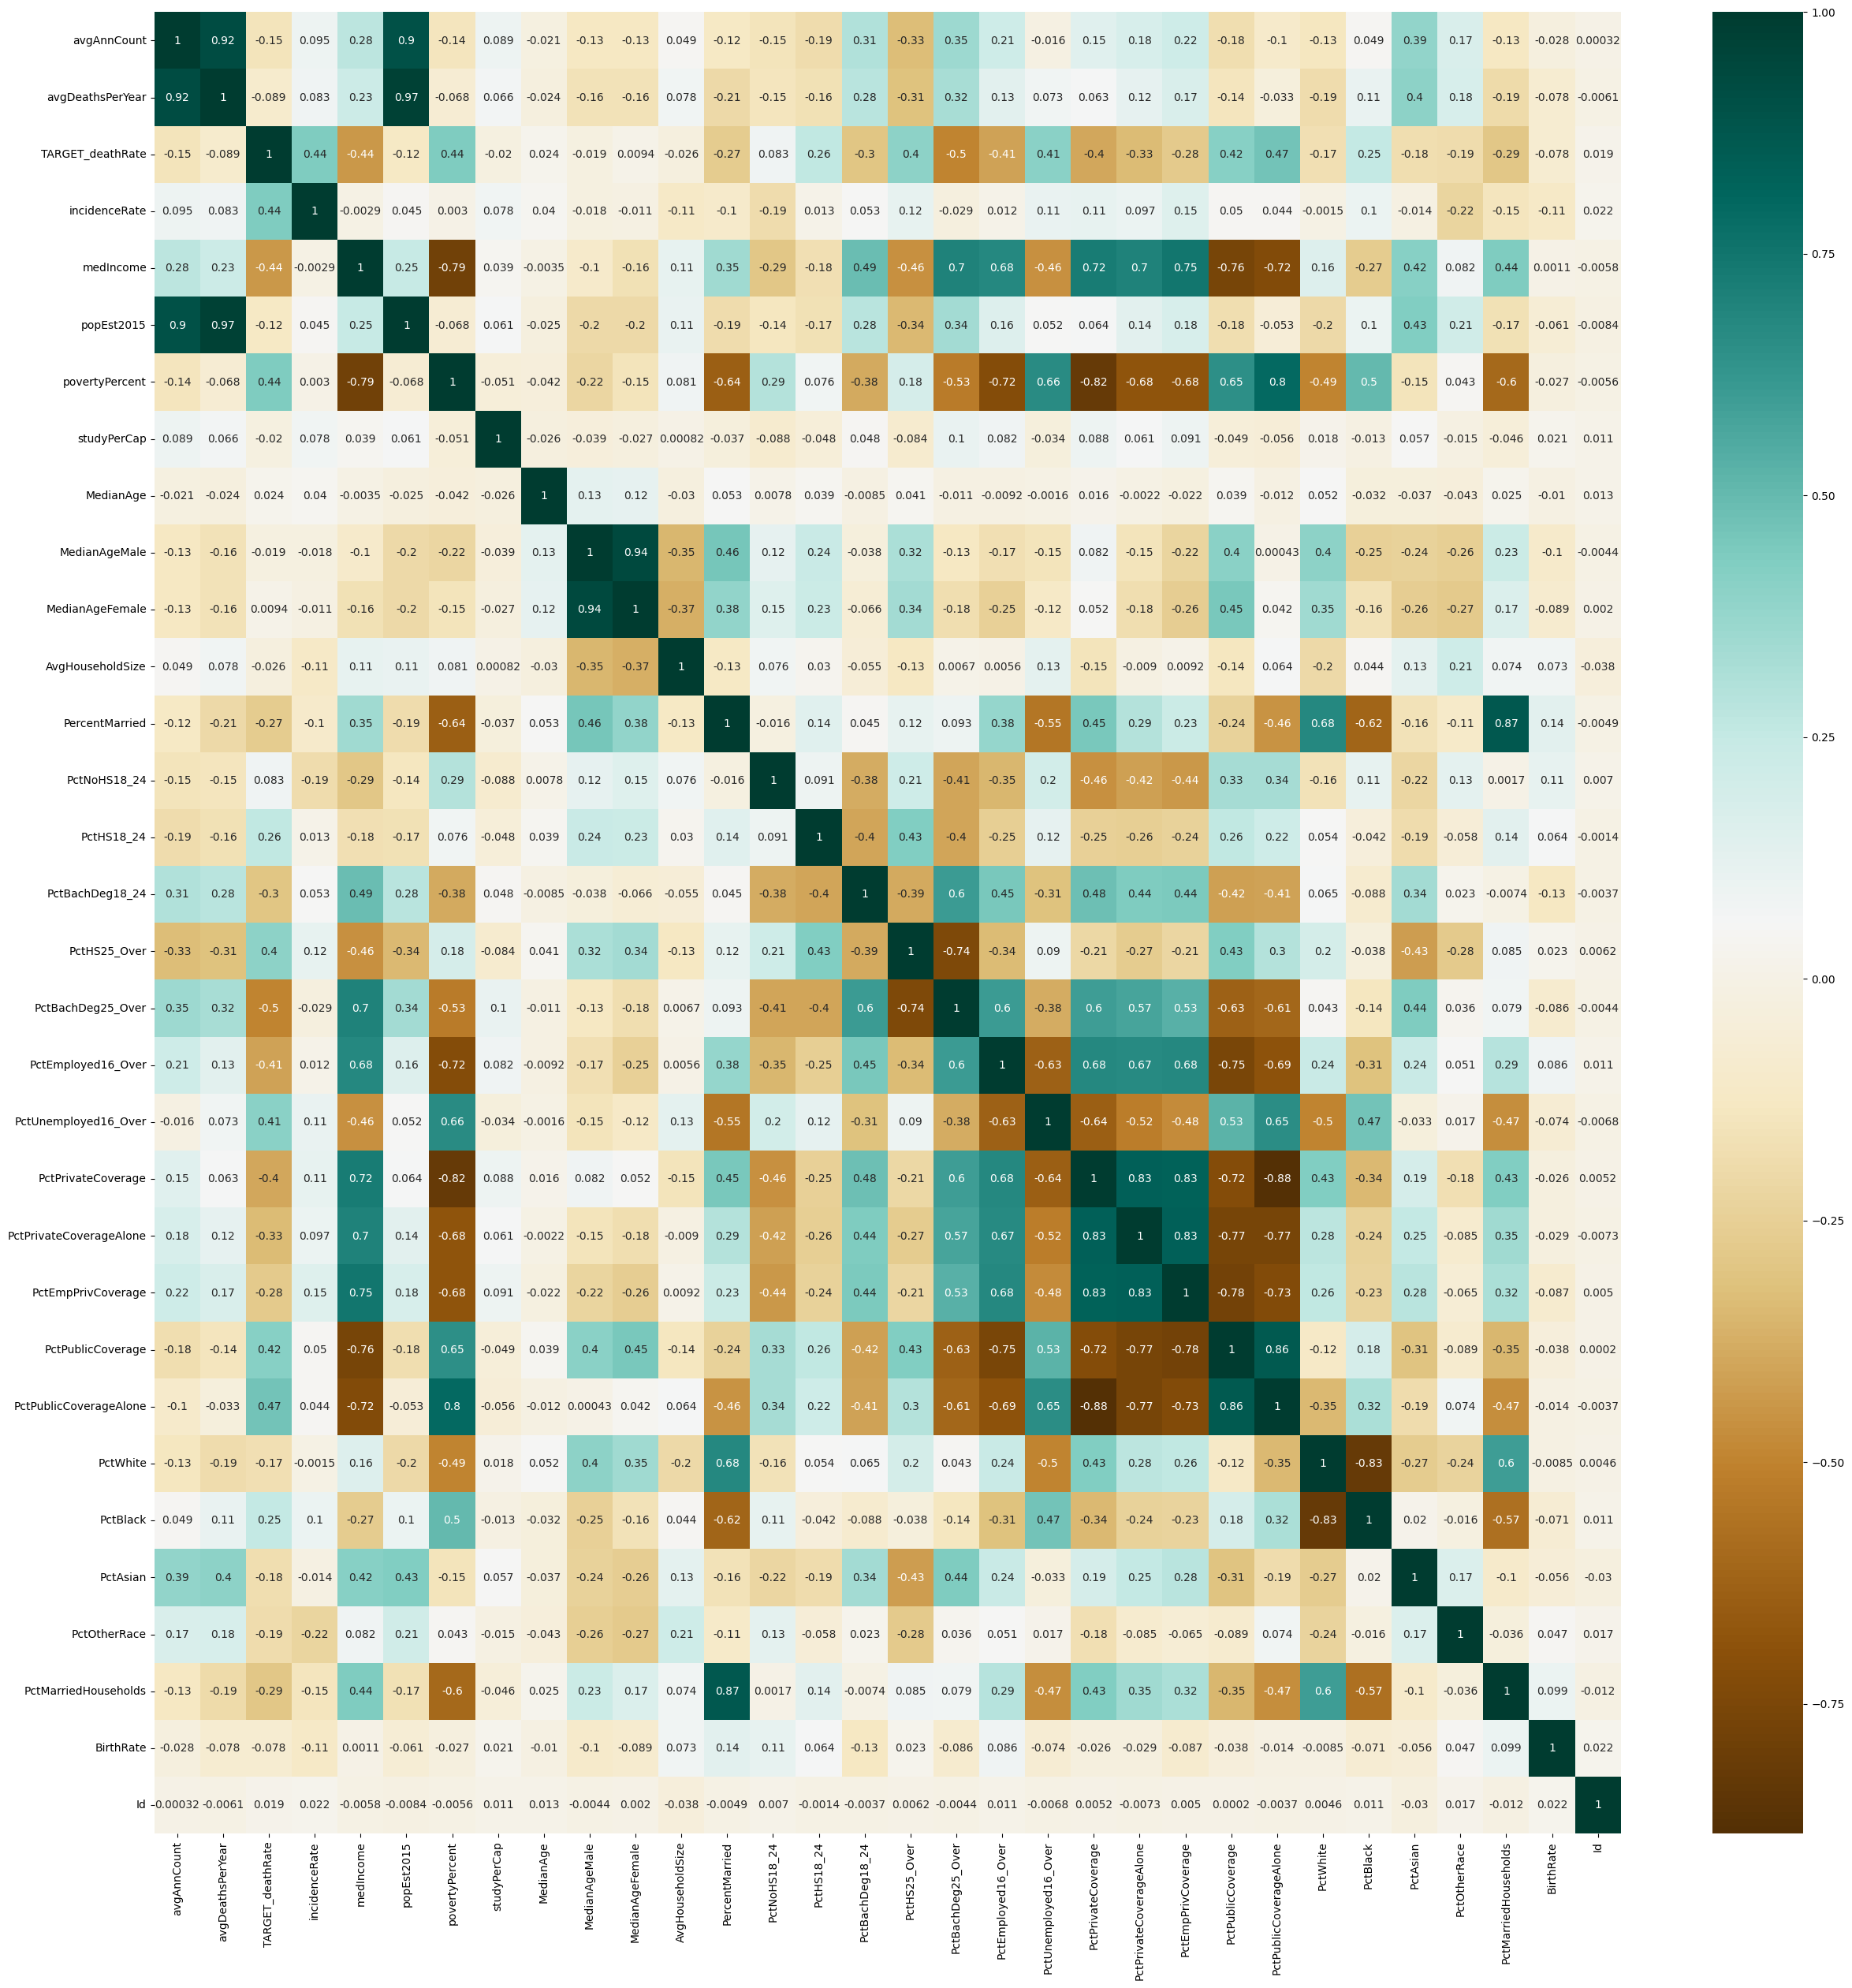

In [21]:
# Plotting Heatmap for Correlation between target 'TARGET_deathRate' variable and different attributes of the dataset. Note: Higher the value more correlated the two variables are. 
plt.figure(figsize=(30, 30))
sns.heatmap(df_train.corr(), annot=True, cmap='BrBG')

#### Observation: 

* Upon analyzing the heatmap and identifying the features with the most significant correlation with target 'TARGET_deathRate' attribute, it appears that among all the numerical characteristics, 'incidenceRate' and 'povertyPercent' are correlated with a coefficient of 0.44. Additionally, 'PctPublicCoverageAlone' has a correlation of 0.47, followed by 'PctPublicCoverage' with 0.42, 'PctUnemployed16_Over' with 0.41, and 'PctHS25_Over' with 0.4.

* Since all of these characteristics have a significant level of correlation with the target variable 'TARGET_deathRate,' conducting analysis for their data distribution before selecting them as a predictor for our multivariate linear regression model.

• Checking the distribution of the chosen numerical features. 

In [22]:
# Extracting 6 continuous/numerical features from the dataset to be used to check its data distribution.
df_continuous_features = df_train[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']]

# Checking its dimension.
df_continuous_features.shape

(2438, 6)

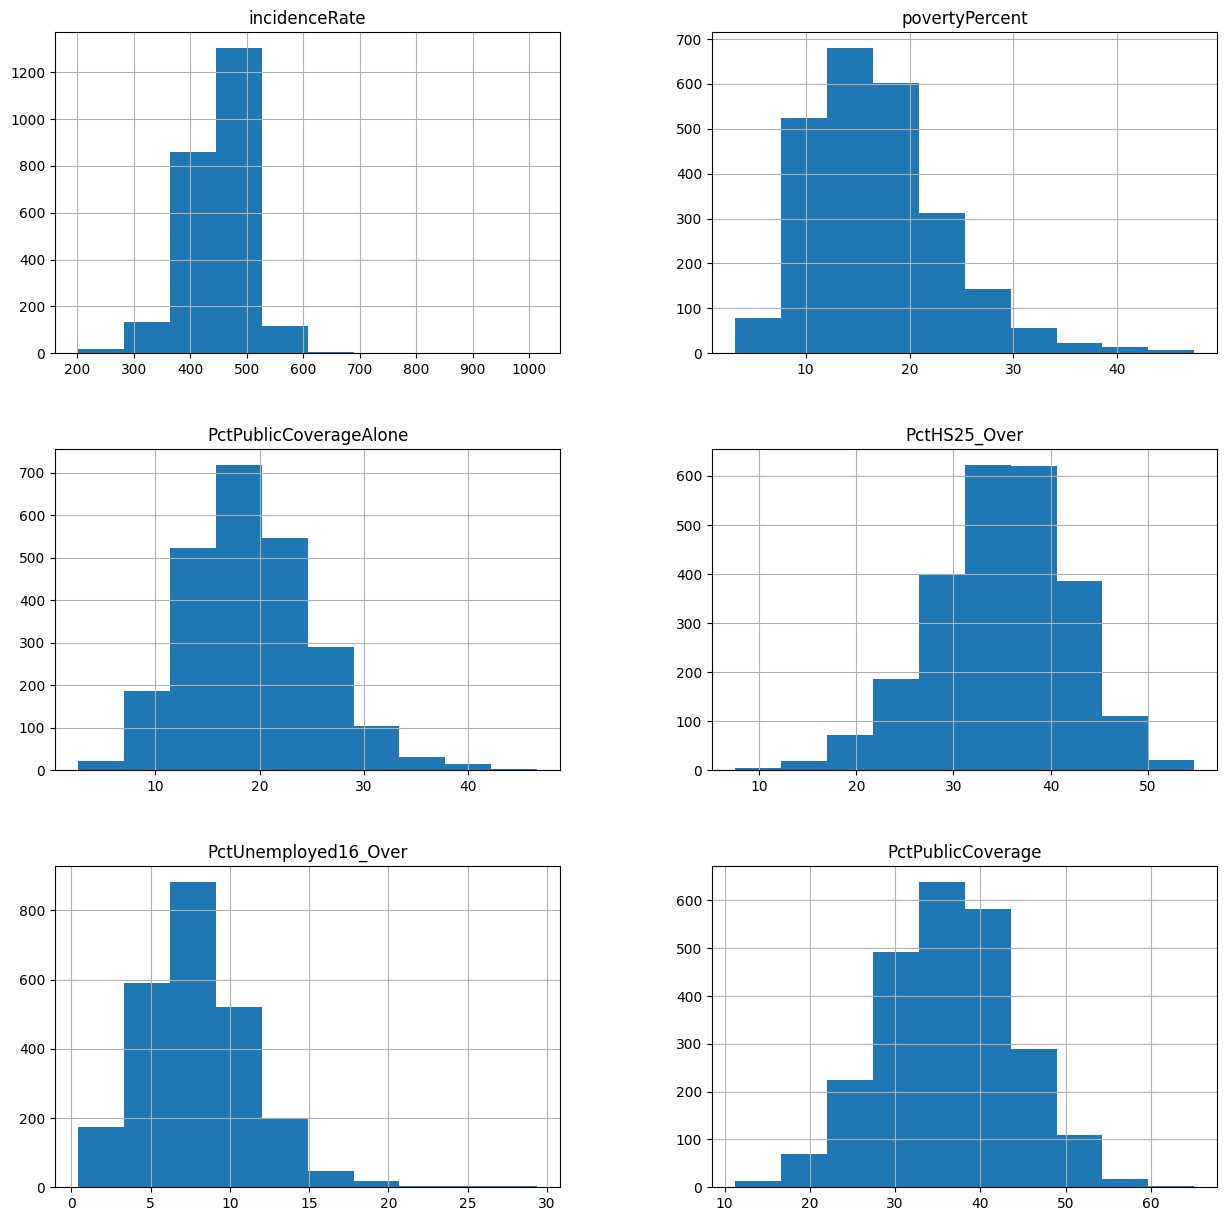

In [23]:
# Creating histogram of the selected numerical features.
histogram = df_continuous_features.hist(figsize=(15,15))

• Examining outliers present in the selected continuous features.

<Axes: xlabel='PctPublicCoverage'>

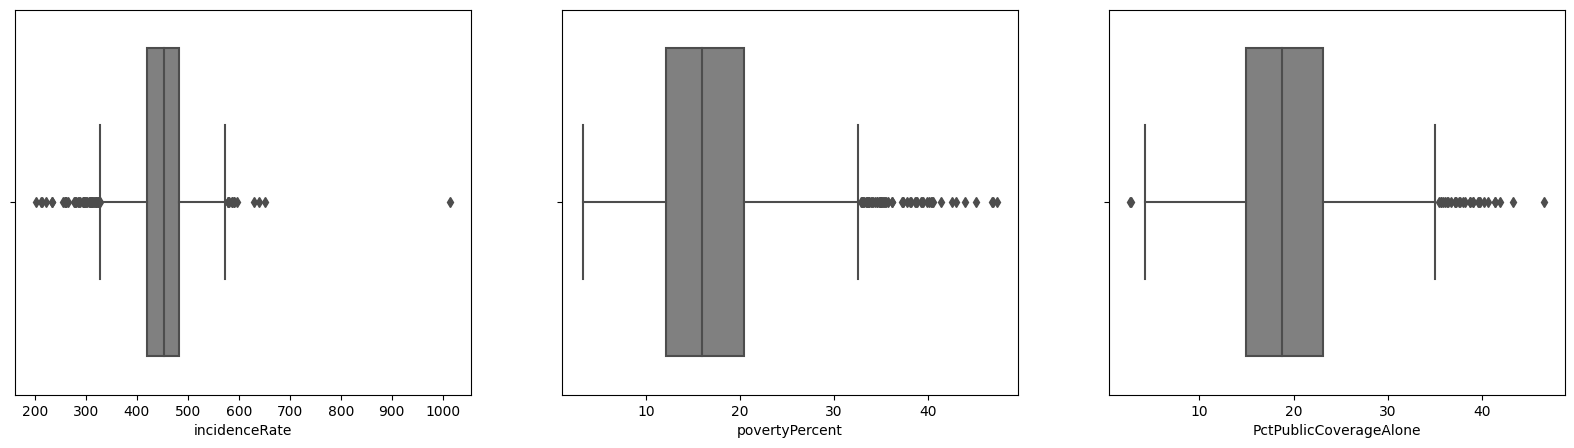

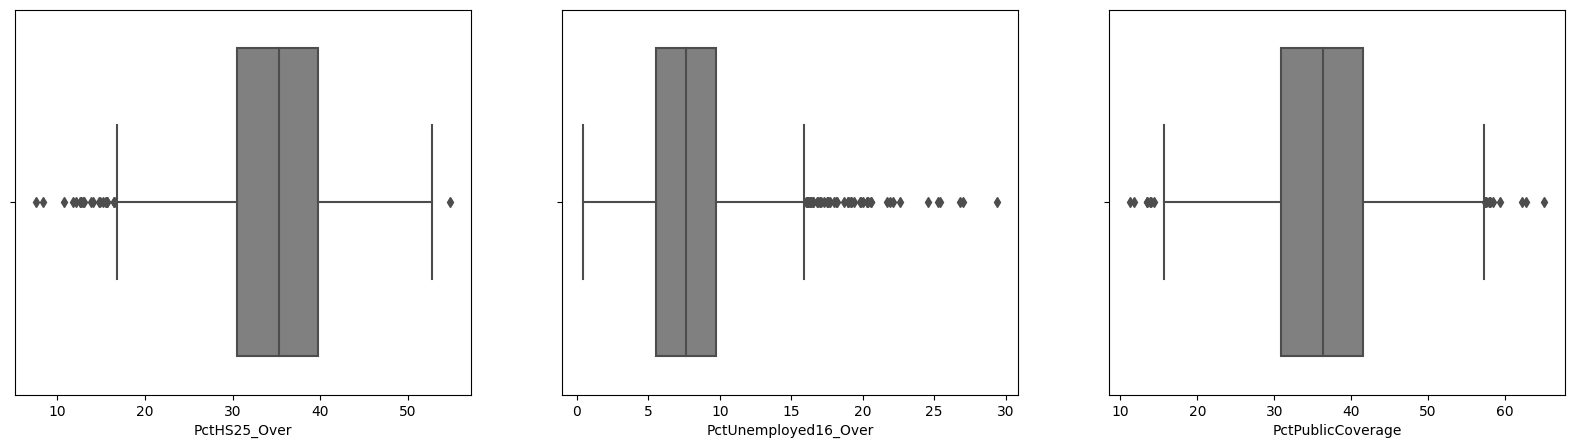

In [24]:
# Detecting outliers in the selected numerical features.
# Graph settings for display
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)

# Ploting box graphs for 'incidenceRate', 'povertyPercent', and 'PctPublicCoverageAlone' attributes.
sns.boxplot(x='incidenceRate', data=df_continuous_features, ax=axes[0], color='grey')
sns.boxplot(x='povertyPercent', data=df_continuous_features, ax=axes[1], color='grey')
sns.boxplot(x='PctPublicCoverageAlone', data=df_continuous_features, ax=axes[2], color='grey')

# Ploting box graphs for 'PctHS25_Over', 'PctUnemployed16_Over', and 'PctPublicCoverage' attributes.
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharey=False)
sns.boxplot(x='PctHS25_Over', data=df_continuous_features, ax=axes[0], color='grey')
sns.boxplot(x='PctUnemployed16_Over', data=df_continuous_features, ax=axes[1], color='grey')
sns.boxplot(x='PctPublicCoverage', data=df_continuous_features, ax=axes[2], color='grey')

• Checking the data distribution of the chosen numerical features with the target 'TARGET_deathRate' variable. 

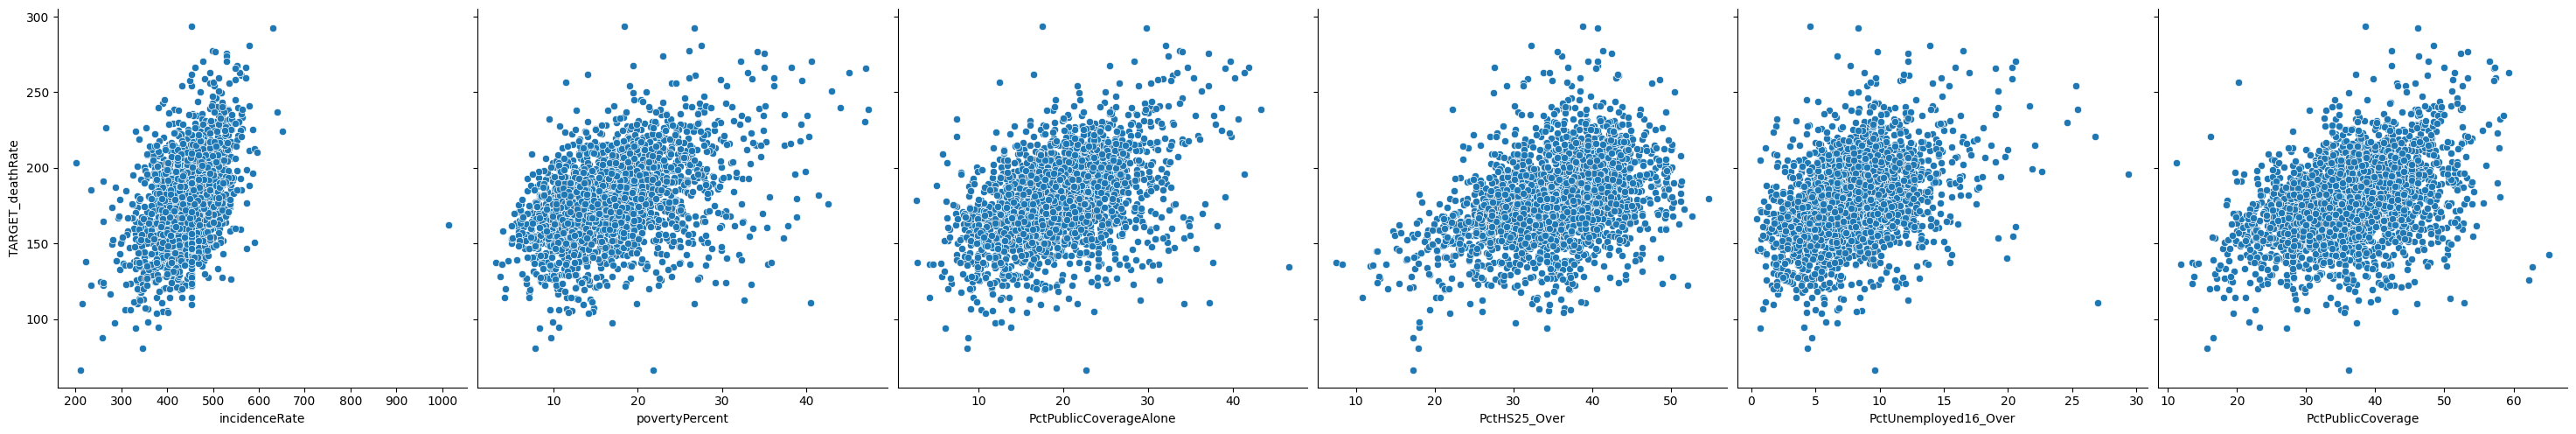

In [25]:
# Plotting the datapoints of the chosen features in relation with target 'TARGET_deathRate' variable.
sns.pairplot(df_train, x_vars=['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage'], 
            y_vars='TARGET_deathRate', height=5)

#### Observation: 

* Based on the pairplot chart displayed above, it seems that all of the selected continuous variables have a relatively linear correlation with the 'TARGET_deathRate' target variable. If a straight line were to be drawn for these variables, it would reasonably fit the data points.

* Since these characteristics have a more significant correlation with the target variable than the other variables, choosing them as multiple features for our multivariate linear regression.

### • Data Preparation

Note: During the initial data exploration phase, the data is processed and readied for the algorithm use.

### **Experiment 1: Building model with multiple selected features.**

#### 4] Selecting Target and Independent Features

In [26]:
# Extracting values for multiple independent features and dependent 'TARGET_deathRate' feature for model training.
X = df_train[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']].values
y = df_train['TARGET_deathRate'].values

# Extracting values for multiple independent features and dependent 'TARGET_deathRate' features for model testing.
X_test = df_test[['incidenceRate', 'povertyPercent', 'PctPublicCoverageAlone', 'PctHS25_Over', 'PctUnemployed16_Over', 'PctPublicCoverage']].values
y_test = df_test['TARGET_deathRate'].values

#### 5] Splitting Data into Training, Validation and Testing Sets

In [27]:
# Create two separate datasets - training and validation, with a ratio of 90 to 10 for the independent feature and target variable.
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.1, random_state = 19)

#### Observation: 

* By creating a validation set, it gives freedom to conduct several experiments, as multiple experiments can be run on model using this set. On the other hand, the testing set should only be used a few times. Therefore, splitting the training set (ratio of 90:10) into a validation set, to leverage more flexibility for experimentation. 

* Although Multivariate Linear Regression is used for assignment objectives, it is an appropriate choice because the target variable, "TARGET_deathRate," and all the chosen independent variables are continuous and can potentially have infinite values. Therefore, Multivariate Linear Regression is a suitable model choice.

### • Modeling

#### 6] Assessing Baseline Performance

In [28]:
# Creating a 'y_mean' variable with mean/average value of the target variable.
y_mean = y_train.mean()

# Creating array named 'y_base' of same dimension as target variable with above 'y_mean' value.
y_base = np.full(y_train.shape, y_mean)

# Calculating the sum of errors, MSE and MAE between the target variable and its average value. 
echo(f'\nBaseline Performance Score:', underline=True) 
print('Sum of Errors:', (y_base - y_train).sum())
print('MSE:', mse(y_train, y_base, squared=True))
print('MAE:', mae(y_train, y_base))
print('RMSE:', mse(y_train, y_base, squared=False))


Baseline Performance Score:
Sum of Errors: -3.5697667044587433e-11
MSE: 744.5850818154925
MAE: 21.183654351928563
RMSE: 27.287086356287517


#### 7] Training Multivariate Linear Regression Model

• Instantiating the LinearRegression class

In [29]:
# Creating an object named 'regmodel' from the instantiation of the LinearRegression class imported from sklearn library.
regmodel = LinearRegression() 

• Fitting the linear regression model using a selected multiple independent features.

In [30]:
# Training the linear regression model with selected multiple independent variables.
regmodel.fit(X_train, y_train)

LinearRegression()

• Predicting the values for the target variable using above trained model.

In [31]:
# Predicting the 'TARGET_deathRate' values for multiple independent features employing above trained multivariate regression model
# and storing the result in 'y_train_predict' variable.
y_train_predict = regmodel.predict(X_train)

In [32]:
# Displaying the line graph of the comparison between the predicted values and actual values of the training set.
perfect_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_train + perfect_train

alt.LayerChart(...)

• Assessing the performance metrics for the training set.

In [33]:
# Evaluating the Mean Square Error(MSE) and Mean Absolute Error(MAE) performance scores on the training set.
echo(f'\nPerformance Score of the Training Set:', underline=True) 
print('Sum of Errors:', (y_train_predict - y_train).sum())
print('MSE:', mse(y_train, y_train_predict, squared=True))
print('MAE:', mae(y_train, y_train_predict))
print('RMSE:', mse(y_train, y_train_predict, squared=False))


Performance Score of the Training Set:
Sum of Errors: 1.5756995708215982e-10
MSE: 397.0357990145632
MAE: 14.864270074667582
RMSE: 19.92575717543911


#### Observation: 

* The earlier established baseline performance acts as the simplest model that always predicts the same baseline value which helps to evaluate the performance of our univariate linear regression model and ensure that we are making progress in the right direction.

* The above mentioned MSE, RMSE and MAE performance for the training set exceeds that of the baseline. Proceeding to predicting values on the validation set and evaluating its performance.

• Predicting on validation set utilizing the above trained model.

In [34]:
# Predicting on validation set and storing result in 'y_validate_predict' variable using the trained model. 
y_validate_predict = regmodel.predict(X_validate)

In [35]:
# Displaying the line graph of the comparison between the predicted values and actual values of the validation set.
perfect_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_validate + perfect_validate


alt.LayerChart(...)

• Evaluating the performance metrics for the validation set.

In [36]:
# Computing the performance scores for Mean Square Error (MSE) and Mean Absolute Error (MAE) on the validation dataset.
echo(f'\nPerformance Score of the Validation Set:', underline=True) 
print('MSE:', mse(y_validate, y_validate_predict, squared=True))
print('MAE:', mae(y_validate, y_validate_predict))
print('RMSE:', mse(y_validate, y_validate_predict, squared=False))


Performance Score of the Validation Set:
MSE: 367.64382737329174
MAE: 14.672071264537662
RMSE: 19.17404045508645


#### Observation: 

* There is a slight difference between the MSE, RMSE and MAE scores of the training and validation sets.

### • Model Evaluation

#### 8] Analysing Model Performance

• Assessing the performance of the model using the testing set.

In [37]:
# Predicting with testing set and storing result in y_test_predict using the testing set. 
y_test_predict = regmodel.predict(X_test)

In [38]:
# Displaying the line graph of the comparison between the predicted values and actual values of the testing set.
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_test + perfect_test

alt.LayerChart(...)

• Assessing the performance metrics for the testing set.

In [39]:
# Calculating the Mean Square Error (MSE) and Mean Absolute Error (MAE) performance metrics for the testing dataset.
echo(f'\nPerformance Score of the Testing Set:', underline=True) 
print('MSE:', mse(y_test, y_test_predict, squared=True))
print('MAE:', mae(y_test, y_test_predict))
print('RMSE:', mse(y_test, y_test_predict, squared=False))


Performance Score of the Testing Set:
MSE: 453.89269620745756
MAE: 15.7580794907932
RMSE: 21.304757595604265


### **Experiment 2: Building model with all continuous features.**

#### 4] Selecting Target and Independent Features

In [40]:
# Extracting values for all the continuous independent features and dependent 'TARGET_deathRate' feature for model training.
df_continuous_features = ['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 
        'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 
        'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 
        'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate']
X = df_train[df_continuous_features].values
y = df_train['TARGET_deathRate'].values

# Extracting values for all the continuous independent features and dependent 'TARGET_deathRate' features for model testing.
X_test = df_test[df_continuous_features].values
y_test = df_test['TARGET_deathRate'].values

#### 5] Splitting Data into Training, Validation and Testing Sets

In [41]:
# Create two separate datasets - training and validation, with a ratio of 90 to 10 for the independent feature and target variable.
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size = 0.1, random_state = 21)

#### 6] Assessing Baseline Performance

Note: Baseline pereformce is calculated in the earlier experiment. 

#### 7] Training Multivariate Linear Regression Model

• Instantiating the LinearRegression class

In [42]:
# Creating an object named 'regmodel' from the instantiation of the LinearRegression class imported from sklearn library.
regmodel = LinearRegression() 

• Fitting the linear regression model using all the continuous independent features.

In [43]:
# Training the linear regression model with all the continuous independent variables.
regmodel.fit(X_train, y_train)

LinearRegression()

• Predicting the values for the target variable using above trained model.

In [44]:
# Predicting the 'TARGET_deathRate' values for all the independent features employing above trained multivariate regression model
# and storing the result in 'y_train_predict' variable.
y_train_predict = regmodel.predict(X_train)

In [45]:
# Displaying the line graph of the comparison between the predicted values and actual values of the training set.
perfect_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train})).mark_line(color='green').encode(
    x='target',
    y='predict'
)

predicted_train = alt.Chart(pd.DataFrame({'target': y_train, 'predict': y_train_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_train + perfect_train

alt.LayerChart(...)

• Assessing the performance metrics for the training set.

In [46]:
# Evaluating the Mean Square Error(MSE) and Mean Absolute Error(MAE) performance scores on the training set.
echo(f'\nPerformance Score of the Training Set:', underline=True) 
print('Sum of Errors:', (y_train_predict - y_train).sum())
print('MSE:', mse(y_train, y_train_predict, squared=True))
print('MAE:', mae(y_train, y_train_predict))
print('RMSE:', mse(y_train, y_train_predict, squared=False))


Performance Score of the Training Set:
Sum of Errors: -2.9389468636509264e-10
MSE: 343.6132327883017
MAE: 13.922001766688478
RMSE: 18.53680751338541


#### Observation: 

* The MSE, RMSE and MAE results for the training set mentioned earlier are better than the baseline. Next, predicting on the validation set and assessing its performance.

• Predicting on validation set utilizing the above trained model.

In [47]:
# Predicting on validation set and storing result in 'y_validate_predict' variable using the trained model. 
y_validate_predict = regmodel.predict(X_validate)

In [48]:
# Displaying the line graph of the comparison between the predicted values and actual values of the validation set.
perfect_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_validate = alt.Chart(pd.DataFrame({'target': y_validate, 'predict': y_validate_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_validate + perfect_validate

alt.LayerChart(...)

• Evaluating the performance metrics for the validation set.

In [49]:
# Computing the performance scores for Mean Square Error (MSE) and Mean Absolute Error (MAE) on the validation dataset.
echo(f'\nPerformance Score of the Validation Set:', underline=True) 
print('MSE:', mse(y_validate, y_validate_predict, squared=True))
print('MAE:', mae(y_validate, y_validate_predict))
print('RMSE:', mse(y_validate, y_validate_predict, squared=False))


Performance Score of the Validation Set:
MSE: 482.13582918308015
MAE: 14.952817378783347
RMSE: 21.957591607074765


#### 8] Analysing Model Performance

• Assessing the performance of the model using the testing set.

In [50]:
# Predicting with testing set and storing result in y_test_predict using the testing set. 
y_test_predict = regmodel.predict(X_test)

In [51]:
# Displaying the line graph of the comparison between the predicted values and actual values of the testing set.
perfect_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test})).mark_line(color='orange').encode(
    x='target',
    y='predict'
)

predicted_test = alt.Chart(pd.DataFrame({'target': y_test, 'predict': y_test_predict})).mark_line().encode(
    x='target',
    y='predict'
  )

predicted_test + perfect_test

alt.LayerChart(...)

In [52]:
# Calculating the Mean Square Error (MSE) and Mean Absolute Error (MAE) performance metrics for the testing dataset.
echo(f'\nPerformance Score of the Testing Set:', underline=True) 
print('MSE:', mse(y_test, y_test_predict, squared=True))
print('MAE:', mae(y_test, y_test_predict))
print('RMSE:', mse(y_test, y_test_predict, squared=False))


Performance Score of the Testing Set:
MSE: 417.8230477157198
MAE: 15.017461353078012
RMSE: 20.440720332603735


### • Summary and Deployment 

* The MSE calculates the average of the squared differences between the predicted and actual values. Since the unit of values is doubled, the error is emphasised. Therefore, to mitigate this effect, the RMSE is used for evaluation below, which cancels out the squaring effect and brings the unit of measurement back to its original scale.

* And the difference between the RMSE scores of both experiment 1 and 2 for all three sets are relatively small, and it suggest that the model is slightly overfitting to some extent on the training data in both experiments. Moreover, the model from experiment 1 is performing slightly well than experiment 2, on the testing data compared to the training data.

    • Experiment 1: RMSE scores of the training (19.9257), validation (19.1740), and testing (21.3047).
    
    • Experiment 2: RMSE scores of the training (18.5368), validation (21.9575), and testing (20.4407).

* Therefore, it seems that in the experiment 1, selecting multiple features based on correlation was a reasonable approach for the model to perform well and generalize better on unseen data compared to using all the features in experiment 2.

* Additionally, to determine to what extent the model is overfitting and improve its generalization performance, it would be helpful to evaluate the model on other metrics and explore other approches such as adjusting the model hyperparameters, regularizing the model to reduce its complexity and prevent overfitting.

* The line charts from both experiments informs that some data points are distant from the line, which indicates a need for further analysis and validation of those observations. A different approach, such as manual intervention, may be necessary when predicting those data points.